In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = Path("Mouse_metadata.csv")
study_results_path = Path("Study_results.csv")


In [3]:
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [4]:
# merge the data
mouse_full_study = pd.merge(study_results,mouse_metadata, on = ['Mouse ID'])
mouse_full_study.sample(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1216,y478,35,61.888027,1,Placebo,Female,3,25
1519,o523,0,45.000000,0,Propriva,Female,6,25
1331,l490,0,45.000000,0,Ceftamin,Male,24,26
1399,u149,20,50.378058,0,Ceftamin,Male,24,29
1881,f966,15,32.623003,0,Capomulin,Male,16,17


In [5]:
#counting number of mice in file
mouse_counts = mouse_full_study.value_counts(['Mouse ID'])
len(mouse_counts)

249

In [6]:
#looking for duplicates in data
mouse_dup = mouse_full_study[mouse_full_study.duplicated(['Mouse ID', "Timepoint"])]
mouse_dup

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
#confirming columns in data
mouse_full_study.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites',
       'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'],
      dtype='object')

In [8]:
#Dropping duplicate mice in dataset
mouse_clean_data = mouse_full_study.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep="first")
mouse_clean_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [9]:
mouse_clean_count = mouse_clean_data.value_counts('Mouse ID')
len(mouse_clean_count)
mouse_clean_count

Mouse ID
a203    10
l897    10
m546    10
m550    10
m601    10
        ..
x226     1
b447     1
f932     1
l872     1
n482     1
Name: count, Length: 249, dtype: int64

In [10]:
tumor_mean = mouse_clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
tumor_mean

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.393463
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [11]:
tumor_median = mouse_clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
tumor_median

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.909965
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [12]:
tumor_var = mouse_clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.138803
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [13]:
tumor_std = mouse_clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
tumor_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.568014
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [14]:
tumor_sem = mouse_clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
tumor_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.525862
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [15]:
#Creating DF of Drug Tumor information.
drug_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean, "Median Tumor Volume": tumor_median.values, "Variance Tumor Volume": tumor_var.values,
                       "Standard Variance Tumor Volume": tumor_std.values, "Standard Error Tumor Volume": tumor_sem.values})
drug_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Variance Tumor Volume,Standard Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [16]:
names = mouse_clean_data.groupby('Drug Regimen')['Timepoint'].count()
names

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

In [17]:
Names_df = pd.DataFrame({"Timepoint": names})
Names_df

,Timepoint
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,156
Ramicane,228
Stelasyn,181


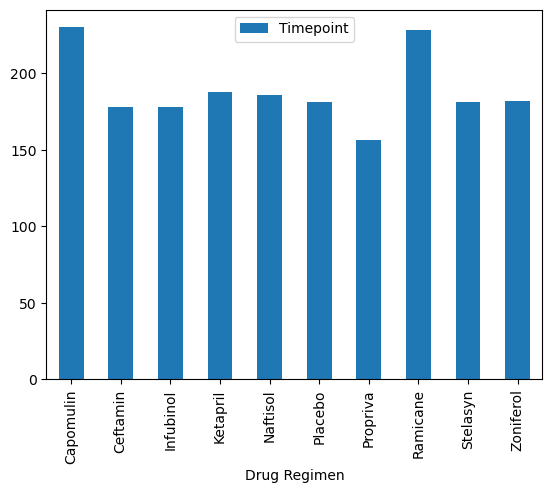

In [18]:
Names_df.plot(kind = "bar")
plt.show()

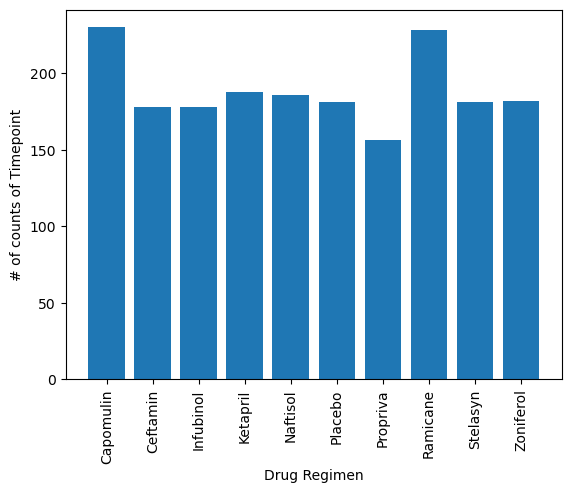

In [19]:
x_axis = names.keys()
y_axis = names.values

plt.bar(x_axis,y_axis)
plt.xlabel("Drug Regimen")
plt.ylabel("# of counts of Timepoint")
plt.xticks(rotation=90)
plt.show()

In [20]:
# data for matplotlib
labels=["Males", "Females"]
counts=[958,930]
colors = ["blue", "Orange"]
male = mouse_clean_data[mouse_clean_data['Sex']=="Male"].count()
female = mouse_clean_data[mouse_clean_data['Sex']=="Female"].count()
gender_df = pd.DataFrame({"Males": male.values, "Females": female.values})
gender_df

,Males,Females
0,958,930
1,958,930
2,958,930
3,958,930
4,958,930
5,958,930
6,958,930
7,958,930


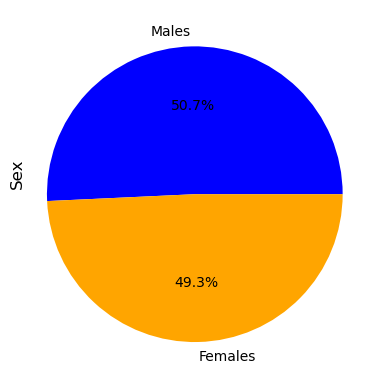

In [21]:
plt.title("Sex", loc="left", rotation=90, y=.5)
plt.pie(counts, labels = labels, colors=colors, autopct="%1.1f%%")
plt.show()

In [22]:
# Data for py Plot
gender_new=pd.DataFrame({"Sex": mouse_clean_data["Sex"].value_counts()})
gender_new

,Sex
Sex,
Male,958
Female,930


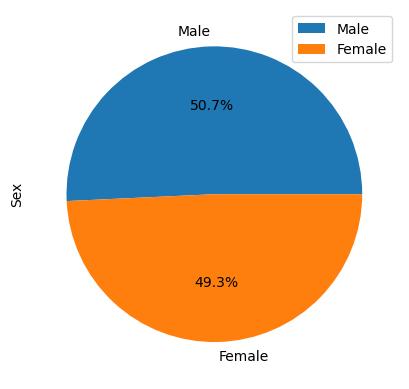

In [23]:
gender_new.plot(kind="pie", subplots=True, autopct="%1.1f%%")
plt.show()

In [24]:
max_timepoint = mouse_clean_data.groupby('Mouse ID')['Timepoint'].max()
max_timepoint_df = pd.DataFrame(max_timepoint)
max_timepoint_df

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [25]:
# Drug_df=mouse_clean_data.set_index("Drug Regimen")
# Drugs = Drug_df.loc[['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']]
# tumor_avg = Drug_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
# tumor_avg
# data = mouse_clean_data['Tumor Volume (mm3)']

In [26]:
# calculating Quartiles for tumor sizes.
data = mouse_clean_data['Tumor Volume (mm3)']
quartiles = data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumors is: {lowerq}")
print(f"The upper quartile of Tumors is: {upperq}")
print(f"The interquartile range of Tumors is: {iqr}")
print(f"The the median of Tumors is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumors is: 45.0
The upper quartile of Tumors is: 56.32407510749999
The interquartile range of Tumors is: 11.324075107499993
The the median of Tumors is: 48.951421075 
Values below 28.01388733875001 could be outliers.
Values above 73.31018776874998 could be outliers.


In [30]:
max_timepoint_df["Drug Regimen"] = mouse_clean_data.loc[:,'Drug Regimen']
max_timepoint_df

,Timepoint,Drug Regimen
Mouse ID,,
a203,45,NaN
a251,45,NaN
a262,45,NaN
a275,45,NaN
a366,30,NaN
...,...,...
z435,10,NaN
z578,45,NaN
z581,45,NaN


In [37]:
new_df = pd.merge(max_timepoint_df, mouse_clean_data, on="Mouse ID")
new_df
new_df = new_df.drop()

,Mouse ID,Timepoint_x,Drug Regimen_x,Timepoint_y,Tumor Volume (mm3),Metastatic Sites,Drug Regimen_y,Sex,Age_months,Weight (g)
0,a203,45,NaN,0,45.000000,0,Infubinol,Female,20,23
1,a203,45,NaN,5,48.508468,0,Infubinol,Female,20,23
2,a203,45,NaN,10,51.852437,1,Infubinol,Female,20,23
3,a203,45,NaN,15,52.777870,1,Infubinol,Female,20,23
4,a203,45,NaN,20,55.173336,1,Infubinol,Female,20,23
...,...,...,...,...,...,...,...,...,...,...
1883,z969,45,NaN,25,63.145652,2,Naftisol,Male,9,30
1884,z969,45,NaN,30,65.841013,3,Naftisol,Male,9,30
1885,z969,45,NaN,35,69.176246,4,Naftisol,Male,9,30
1886,z969,45,NaN,40,70.314904,4,Naftisol,Male,9,30


In [39]:

for index,row in new_df.iterrow():
    if new_df['Timepoint_x']!=new_df['Timepoint_y']:
        new_df.drop(row)
new_df

AttributeError: 'DataFrame' object has no attribute 'iterrow'